# Canvas 2
Example of canvas partitioning.
Sometimes the Divide() method is not appropriate to divide a Canvas.
Because of the left and right margins, all the pads do not have the
same width and height. CanvasPartition does that properly. This
example also ensure that the axis labels and titles have the same
sizes and that the tick marks length is uniform.




**Author:** Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:38 AM.</small></i>

In [1]:
void CanvasPartition(TCanvas *C,const Int_t Nx = 2,const Int_t Ny = 2,
                     Float_t lMargin = 0.15, Float_t rMargin = 0.05,
                     Float_t bMargin = 0.15, Float_t tMargin = 0.05);

 A helper function is created: 

In [2]:
%%cpp -d
void CanvasPartition(TCanvas *C,const Int_t Nx,const Int_t Ny,
                     Float_t lMargin, Float_t rMargin,
                     Float_t bMargin, Float_t tMargin)
{
   if (!C) return;

   // Setup Pad layout:
   Float_t vSpacing = 0.0;
   Float_t vStep  = (1.- bMargin - tMargin - (Ny-1) * vSpacing) / Ny;

   Float_t hSpacing = 0.0;
   Float_t hStep  = (1.- lMargin - rMargin - (Nx-1) * hSpacing) / Nx;

   Float_t vposd,vposu,vmard,vmaru,vfactor;
   Float_t hposl,hposr,hmarl,hmarr,hfactor;

   for (Int_t i=0;i<Nx;i++) {

      if (i==0) {
         hposl = 0.0;
         hposr = lMargin + hStep;
         hfactor = hposr-hposl;
         hmarl = lMargin / hfactor;
         hmarr = 0.0;
      } else if (i == Nx-1) {
         hposl = hposr + hSpacing;
         hposr = hposl + hStep + rMargin;
         hfactor = hposr-hposl;
         hmarl = 0.0;
         hmarr = rMargin / (hposr-hposl);
      } else {
         hposl = hposr + hSpacing;
         hposr = hposl + hStep;
         hfactor = hposr-hposl;
         hmarl = 0.0;
         hmarr = 0.0;
      }

      for (Int_t j=0;j<Ny;j++) {

         if (j==0) {
            vposd = 0.0;
            vposu = bMargin + vStep;
            vfactor = vposu-vposd;
            vmard = bMargin / vfactor;
            vmaru = 0.0;
         } else if (j == Ny-1) {
            vposd = vposu + vSpacing;
            vposu = vposd + vStep + tMargin;
            vfactor = vposu-vposd;
            vmard = 0.0;
            vmaru = tMargin / (vposu-vposd);
         } else {
            vposd = vposu + vSpacing;
            vposu = vposd + vStep;
            vfactor = vposu-vposd;
            vmard = 0.0;
            vmaru = 0.0;
         }

         C->cd(0);

         char name[16];
         sprintf(name,"pad_%i_%i",i,j);
         TPad *pad = (TPad*) gROOT->FindObject(name);
         if (pad) delete pad;
         pad = new TPad(name,"",hposl,vposd,hposr,vposu);
         pad->SetLeftMargin(hmarl);
         pad->SetRightMargin(hmarr);
         pad->SetBottomMargin(vmard);
         pad->SetTopMargin(vmaru);

         pad->SetFrameBorderMode(0);
         pad->SetBorderMode(0);
         pad->SetBorderSize(0);

         pad->Draw();
      }
   }
}

In [3]:
gStyle->SetOptStat(0);

TCanvas *C = (TCanvas*) gROOT->FindObject("C");
if (C) delete C;
C = new TCanvas("C","canvas",1024,640);
C->SetFillStyle(4000);

Number of pads

In [4]:
const Int_t Nx = 5;
const Int_t Ny = 5;

Margins

In [5]:
Float_t lMargin = 0.12;
Float_t rMargin = 0.05;
Float_t bMargin = 0.15;
Float_t tMargin = 0.05;

Canvas setup

In [6]:
CanvasPartition(C,Nx,Ny,lMargin,rMargin,bMargin,tMargin);

Dummy histogram.

In [7]:
TH1F *h = (TH1F*) gROOT->FindObject("histo");
if (h) delete h;
h = new TH1F("histo","",100,-5.0,5.0);
h->FillRandom("gaus",10000);
h->GetXaxis()->SetTitle("x axis");
h->GetYaxis()->SetTitle("y axis");

TPad *pad[Nx][Ny];

for (Int_t i=0;i<Nx;i++) {
   for (Int_t j=0;j<Ny;j++) {
      C->cd(0);

      // Get the pads previously created.
      char pname[16];
      sprintf(pname,"pad_%i_%i",i,j);
      pad[i][j] = (TPad*) gROOT->FindObject(pname);
      pad[i][j]->Draw();
      pad[i][j]->SetFillStyle(4000);
      pad[i][j]->SetFrameFillStyle(4000);
      pad[i][j]->cd();

      // Size factors
      Float_t xFactor = pad[0][0]->GetAbsWNDC()/pad[i][j]->GetAbsWNDC();
      Float_t yFactor = pad[0][0]->GetAbsHNDC()/pad[i][j]->GetAbsHNDC();

      char hname[16];
      sprintf(hname,"h_%i_%i",i,j);
      TH1F *hFrame = (TH1F*) h->Clone(hname);
      hFrame->Reset();
      hFrame->Draw();

      // y axis range
      hFrame->GetYaxis()->SetRangeUser(0.0001,1.2*h->GetMaximum());

      // Format for y axis
      hFrame->GetYaxis()->SetLabelFont(43);
      hFrame->GetYaxis()->SetLabelSize(16);
      hFrame->GetYaxis()->SetLabelOffset(0.02);
      hFrame->GetYaxis()->SetTitleFont(43);
      hFrame->GetYaxis()->SetTitleSize(16);
      hFrame->GetYaxis()->SetTitleOffset(5);

      hFrame->GetYaxis()->CenterTitle();
      hFrame->GetYaxis()->SetNdivisions(505);

      // TICKS Y Axis
      hFrame->GetYaxis()->SetTickLength(xFactor*0.04/yFactor);

      // Format for x axis
      hFrame->GetXaxis()->SetLabelFont(43);
      hFrame->GetXaxis()->SetLabelSize(16);
      hFrame->GetXaxis()->SetLabelOffset(0.02);
      hFrame->GetXaxis()->SetTitleFont(43);
      hFrame->GetXaxis()->SetTitleSize(16);
      hFrame->GetXaxis()->SetTitleOffset(5);
      hFrame->GetXaxis()->CenterTitle();
      hFrame->GetXaxis()->SetNdivisions(505);

      // TICKS X Axis
      hFrame->GetXaxis()->SetTickLength(yFactor*0.06/xFactor);

      h->Draw("same");
   }
}
C->cd();

Draw all canvases 

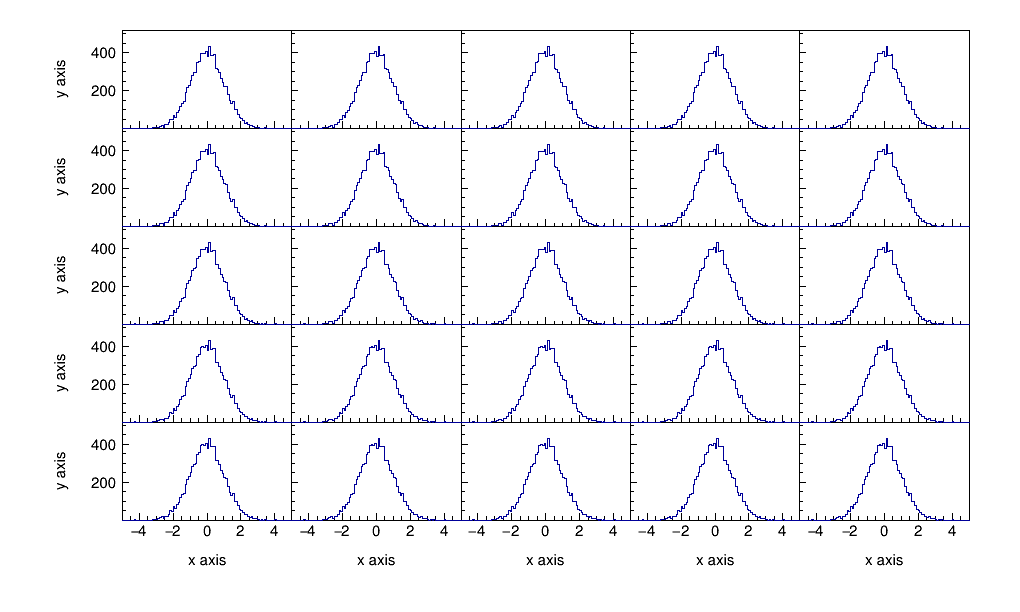

In [8]:
gROOT->GetListOfCanvases()->Draw()